# Inferring mean and variance of normally distributed data

In this task you compute the posterior distribution over the mean $x$ and variance $\sigma^2$ of normally distributed data.

We also visualize samples from the prior and the posterior to better understand how our estimate over the parameters is updated with the data.

Below are function definitions for the normal-inverse-gamma distribution, as you saw them in your pre-class work.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

'''
Function definitions for the normal-inverse-gamma distribution. The parameters
of the distribution, namely mu (μ), either lambda (λ) or nu (ν), alpha (α),
beta (β), are used as defined here:

  https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution

Note that we use the symbol nu (ν) rather than lambda (λ) for the third
parameter. This is to match the notation used in the conjugate priors table on
Wikipedia:

  https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions
'''

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        sts.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        sts.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()

## Task 1: Visualize the data
1. Plot a histogram of the data below.
2. Do the data look normally distributed?
3. Calculate the sample mean and sample variance of the data.

In [2]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

200 data


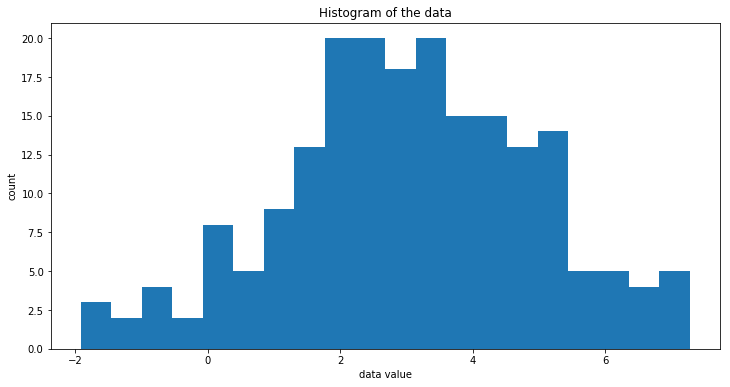

Data sample mean: 3.065080189542003
Data sample variance: 3.6152141787699223


In [3]:
# Plot a histogram of the data. Do the data look normally distributed?
plt.figure(figsize=(12, 6))
plt.hist(data, bins=20)
plt.xlabel('data value')
plt.ylabel('count')
plt.title('Histogram of the data')
plt.show()

# Calculate the sample mean and variance of the data
print('Data sample mean:', np.mean(data))
print('Data sample variance:', np.var(data))

## Task 2: Calculate posterior
1. Below are the prior hyperparameters from your pre-class work.

   **Run the code** to see samples from the prior and an estimate of the prior 95% confidence interval over $x$ and $\sigma^2$.

2. **Calculate the posterior distribution** over $x$ and $\sigma^2$ using the prior hyperparameters below and the data set above.

# START HERE

In [14]:
# Method 1 - using optimization function
# x = [mu, nu, alpha, beta]
import numpy as np
from scipy.optimize import minimize
def obj_func(x):
    return (x[0]-2.3)**2 + (x[3]/(x[2]-1)-2.75)**2+(x[3]/((x[2]-1)*x[1])-0.25)**2+(x[3]**2/((x[2]-1)**2*(x[2]-2))-1)**2

x_initial = np.array([2.3, 1, 3, 2])
result = minimize(obj_func, x_initial)
x_final = result.x
print(x_final)

[ 2.30000185 11.00035991  9.56247566 23.54680287]


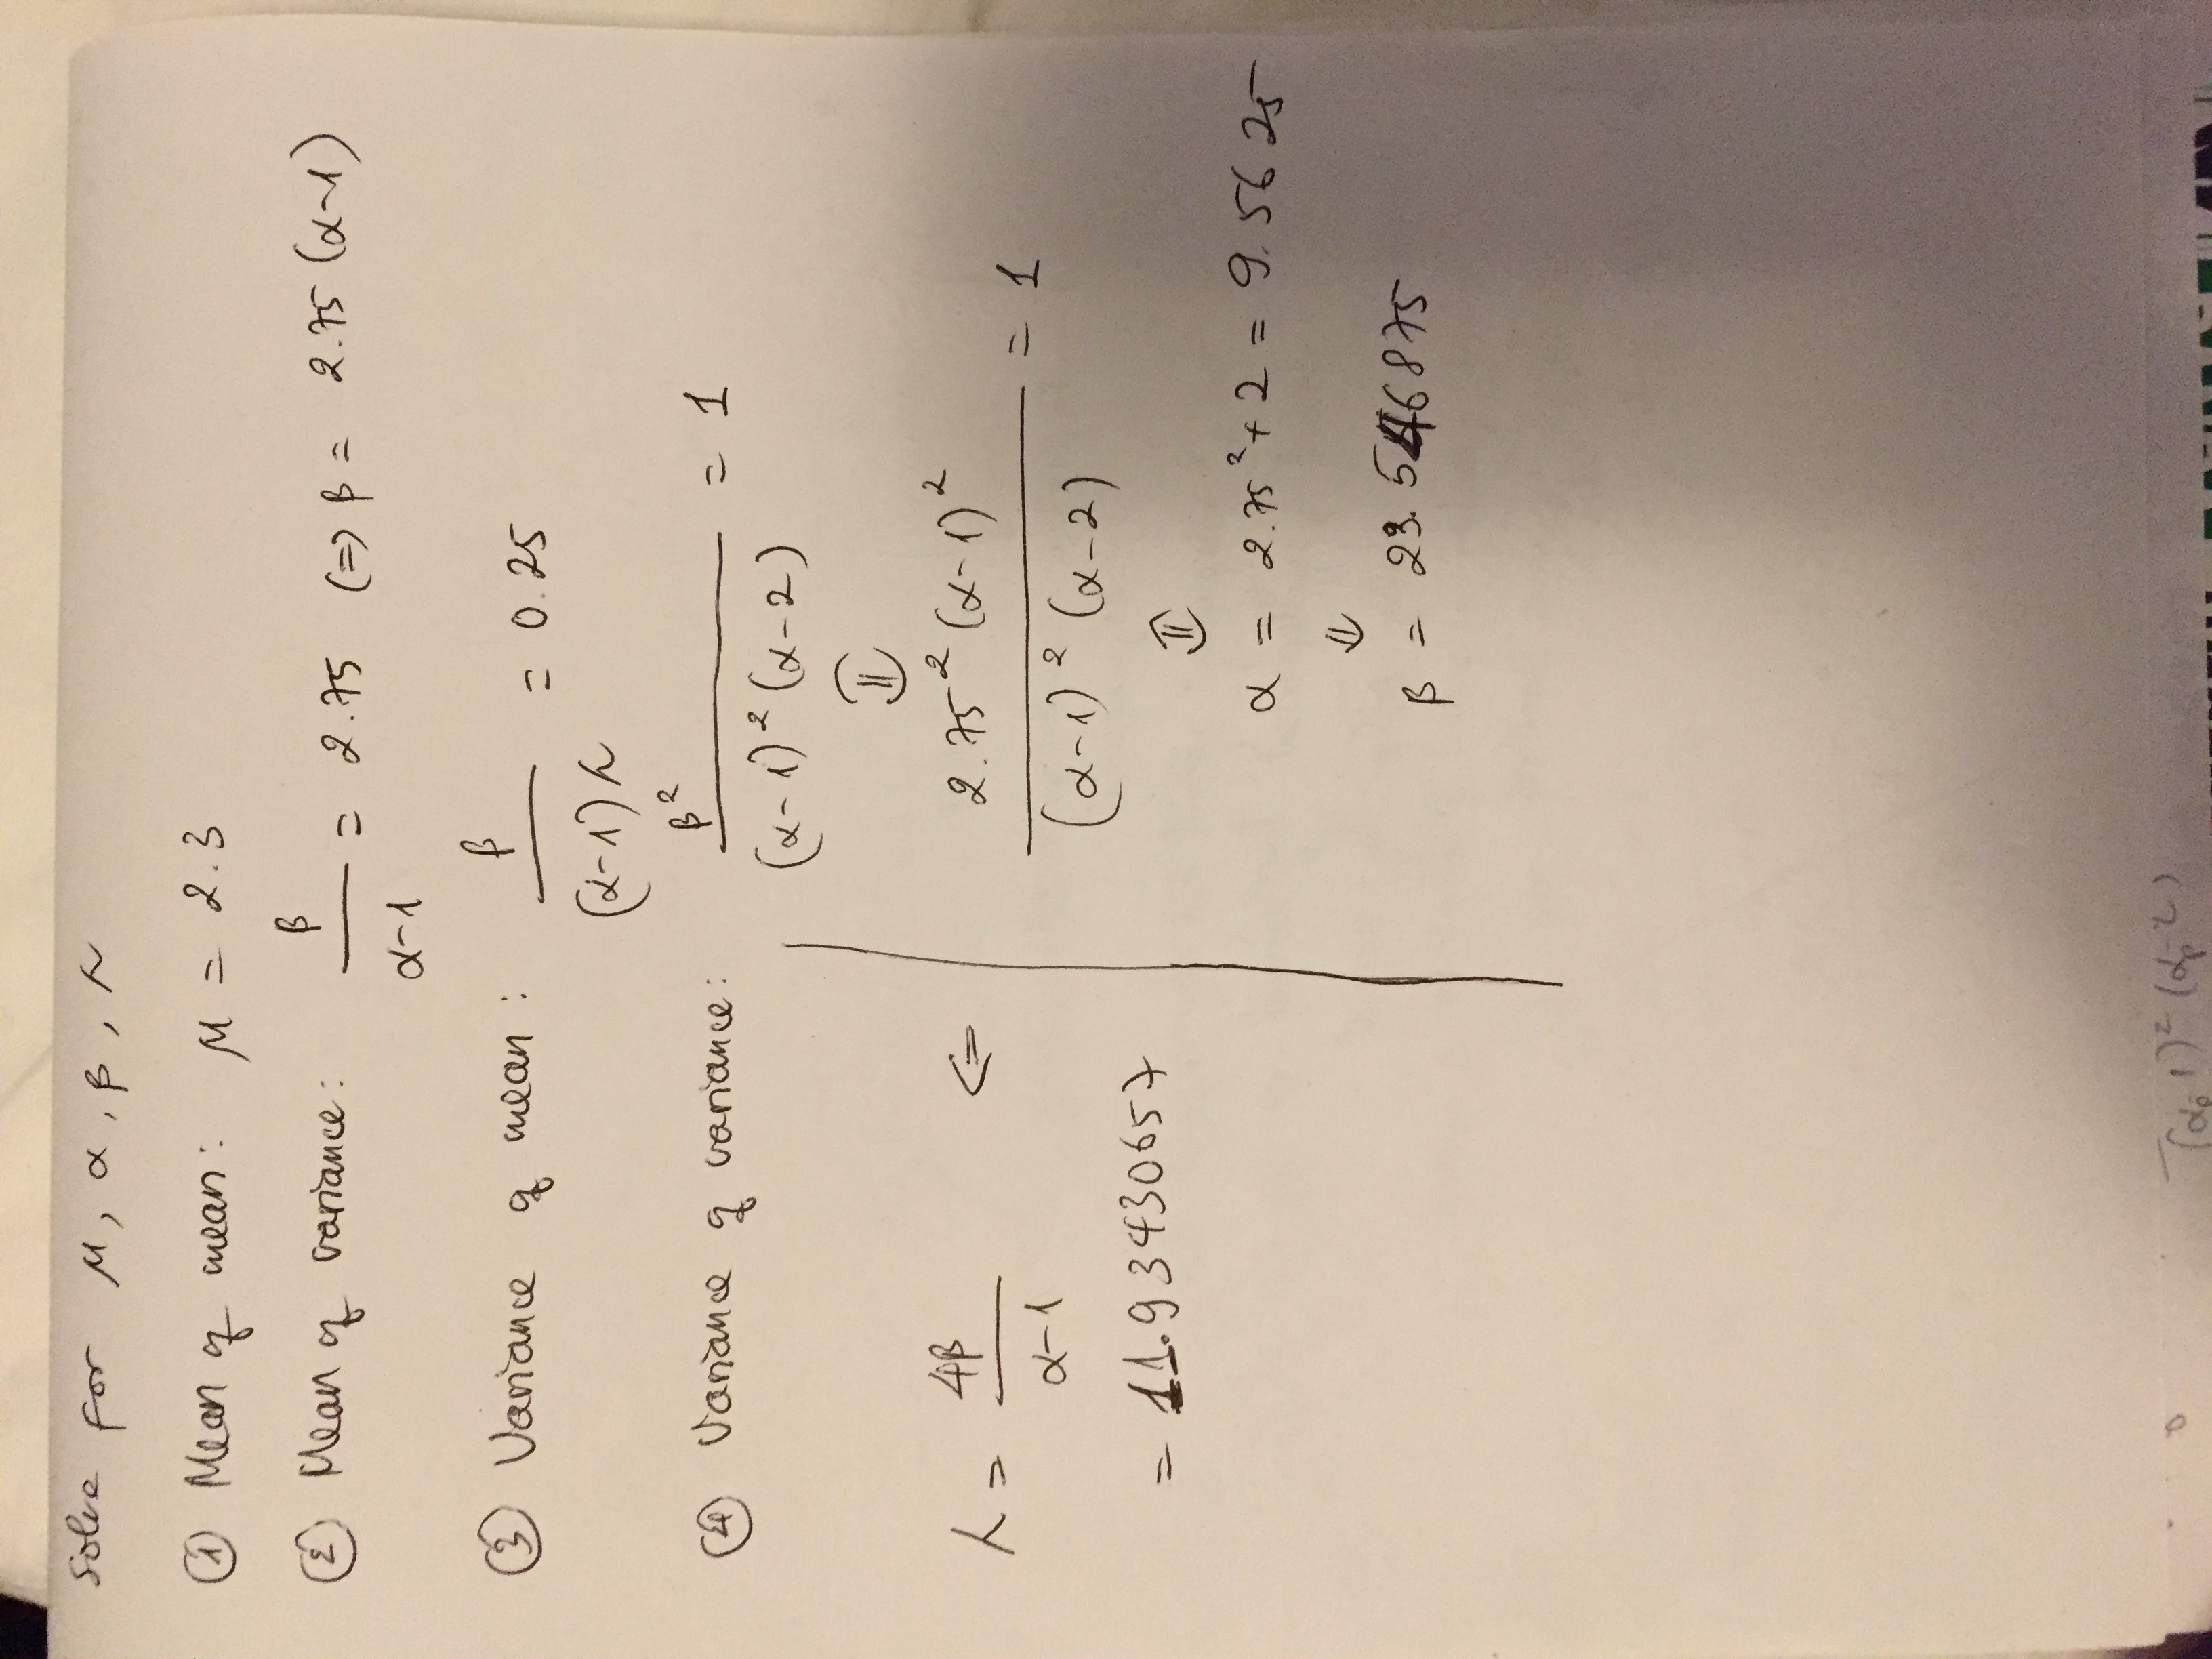

In [21]:
# Method 2 - solving the 4 constraints
from IPython.display import Image
Image('4.1.JPG')

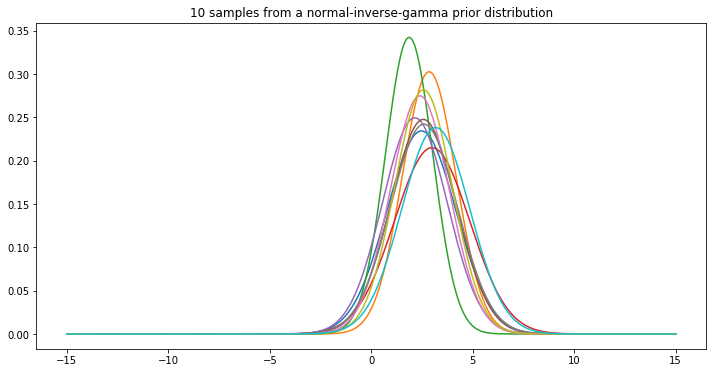

95% prior confidence intervals:
x: [1.312, 3.288]
σ²: [1.427, 5.236]


In [17]:
# mu_0 = 0        # The prior mean is centered around 0.
# nu_0 = 0.054    # The smaller ν₀ is, the more uncertain we are about the prior mean.
# alpha_0 = 1.12  # α₀ and β₀ govern the marginal prior over the variance.
# beta_0 = 0.4
mu_0 = x_final[0]
nu_0 = x_final[1]
alpha_0 = x_final[2]
beta_0 = x_final[3]


# Plot samples from the prior
num_samples = 10
samples = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=num_samples)

plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = sts.norm.pdf(plot_x, loc=samples[i, 0], scale=np.sqrt(samples[i, 1]))
    plt.plot(plot_x, plot_y)
plt.title('%i samples from a normal-inverse-gamma prior distribution' % num_samples)
plt.show()


# Estimate the 95% prior confidence intervals
samples = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=1000000)
print('95% prior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(samples[:,0], 2.5),
    np.percentile(samples[:,0], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(samples[:,1], 2.5),
    np.percentile(samples[:,1], 97.5)))

In [18]:
# Calculate the posterior distribution over mean x and variance σ²

data_len = len(data)
data_mean = np.mean(data)

mu_post = (nu_0 * mu_0 + data_len * data_mean) / (nu_0 + data_len)
nu_post = nu_0 + data_len
alpha_post = alpha_0 + data_len / 2
beta_post = (
    beta_0 +
    0.5 * np.sum((data - data_mean) ** 2) +
    (data_len * nu_0) / (nu_0 + data_len) * 0.5 * (data_mean - mu_0) ** 2)

print(mu_post, nu_post, alpha_post, beta_post)

3.0251933516966116 211.00035990502073 109.56247565699323 388.119876333327


## Task 3: Visualize and summarize posterior
1. **Generate 10 samples from your posterior and plot** the
   normal distributions corresponding to those samples.

   Compared to the prior, you should
   see that samples from the posterior are much more similar to each other.

2. **Estimate 95% posterior confidence intervals** for the mean and variance of the data.

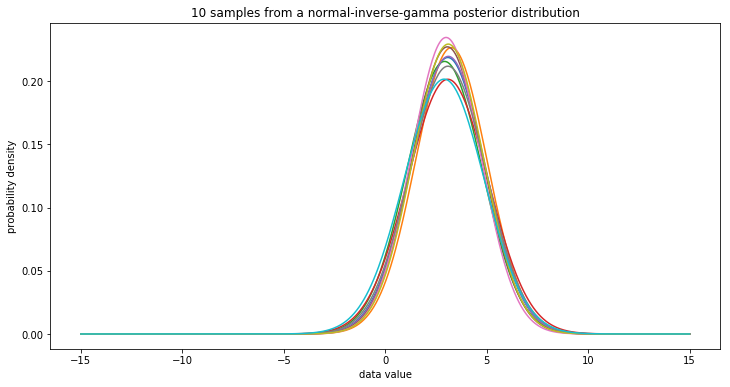

95% posterior confidence intervals:
x: [2.770, 3.281]
σ²: [2.962, 4.311]


In [19]:
# Generate 10 samples from the posterior
num_samples = 10
samples = norminvgamma_rvs(mu_post, nu_post, alpha_post, beta_post, size=num_samples)

# Plot the normal distributions corresponding to the samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = sts.norm.pdf(plot_x, loc=samples[i,0], scale=np.sqrt(samples[i,1]))
    plt.plot(plot_x, plot_y)
plt.xlabel('data value')
plt.ylabel('probability density')
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_samples)
plt.show()

# Estimate 95% posterior confidence intervals for the mean x and variance σ² of the data
samples = norminvgamma_rvs(mu_post, nu_post, alpha_post, beta_post, size=1000000)
print('95% posterior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(samples[:,0], 2.5),
    np.percentile(samples[:,0], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(samples[:,1], 2.5),
    np.percentile(samples[:,1], 97.5)))